- Link to the dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

### Simple Linear Regression

Predicted score for 6 hours: 120.00


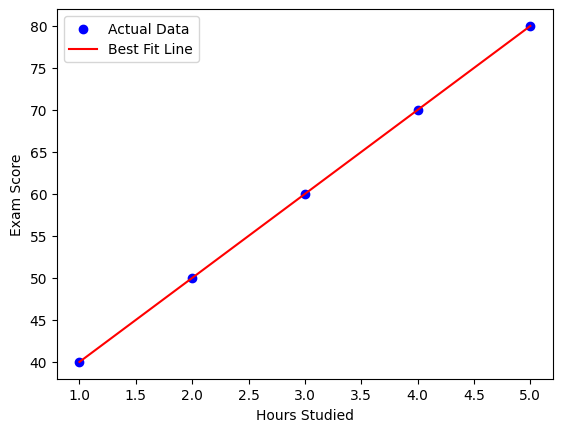

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Hours studied
y = np.array([40, 50, 60, 70, 80])           # Scores

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Prediction
predicted = model.predict(np.array([[9]]))
print(f"Predicted score for 6 hours: {predicted[0]:.2f}")

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Best Fit Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [ ]:
np.array([[6]])

array([[6]])

In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
df = pd.read_csv('/content/Housing.csv')
y = df['price']
X = df.drop(columns=['price'])

In [ ]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
city_a city_b city_c
0         0       1
1         0

In [ ]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
# Identify column types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
num_cols

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(X[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -0.80574124],
       [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013, -0.80574124]])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='drop'
)

In [ ]:
# Helper to pull feature names after one-hot + scale
def get_feature_names(preprocessor):
    names = []
    # numeric names (unchanged)
    names.extend(num_cols)
    # categorical names (OHE makes new columns)
    ohe: OneHotEncoder = preprocessor.named_transformers_['cat']
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()
    names.extend(cat_feature_names)
    return names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [ ]:
X_train.shape

(436, 12)

In [ ]:
models_and_grids = {
    "LinearRegression": (LinearRegression(), {}),  # no tuning
    "Ridge": (Ridge(random_state=42), {"model__alpha": np.logspace(-3, 3, 13)}),
    "Lasso": (Lasso(max_iter=10000, random_state=42), {"model__alpha": np.logspace(-3, 3, 13)}),
    "ElasticNet": (
        ElasticNet(max_iter=10000, random_state=42),
        {
            "model__alpha": np.logspace(-3, 3, 13),
            "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
        }
    ),
}

In [ ]:
for (estimator, grid) in models_and_grids.items():
  print(grid)

(LinearRegression(), {})
(Ridge(random_state=42), {'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])})
(Lasso(max_iter=10000, random_state=42), {'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])})
(ElasticNet(max_iter=10000, random_state=42), {'model__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]), 'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})


In [ ]:
rows = []
fitted_pipelines = {}
best_params = {}

for name, (estimator, grid) in models_and_grids.items():
    pipe = Pipeline(steps=[("pre", preprocessor), ("model", estimator)])

    if grid:  # tuned models
        gs = GridSearchCV(
            pipe,
            param_grid=grid,
            cv=5,
            scoring="r2",
            n_jobs=-1,
            refit=True
        )
        gs.fit(X_train, y_train)
        best_pipe = gs.best_estimator_
        best_params[name] = gs.best_params_
    else:
        best_pipe = pipe.fit(X_train, y_train)
        best_params[name] = {}

    fitted_pipelines[name] = best_pipe

    # Predictions
    y_pred = best_pipe.predict(X_test)

    # Metrics on test set
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cross-validated R^2 on training set (how stable is it)
    cv_r2 = cross_val_score(best_pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1).mean()

    rows.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2_test": r2,
        "CV_R2_train": cv_r2
    })

In [ ]:
results = pd.DataFrame(rows).sort_values(by="R2_test", ascending=False)
pd.options.display.float_format = "{:,.3f}".format
print("\n=== Performance (higher R2 is better; lower errors are better) ===")
print(results.to_string(index=False))

print("\n=== Best Params (for tuned models) ===")
for k, v in best_params.items():
    if v:
        print(f"{k}: {v}")


=== Performance (higher R2 is better; lower errors are better) ===
           Model         MAE                   MSE          RMSE  R2_test  CV_R2_train
LinearRegression 970,043.404 1,754,318,687,330.667 1,324,506.960    0.653        0.647
           Lasso 970,676.750 1,757,459,801,961.882 1,325,692.197    0.652        0.647
      ElasticNet 979,390.683 1,790,790,343,427.982 1,338,204.149    0.646        0.649
           Ridge 979,663.504 1,791,977,053,611.368 1,338,647.472    0.645        0.648

=== Best Params (for tuned models) ===
Ridge: {'model__alpha': np.float64(10.0)}
Lasso: {'model__alpha': np.float64(1000.0)}
ElasticNet: {'model__alpha': np.float64(0.03162277660168379), 'model__l1_ratio': 0.3}


In [ ]:
def print_top_coefs(pipe, top_k=10):
    # Retrieve trained preprocessor to get feature names
    pre: ColumnTransformer = pipe.named_steps["pre"]
    feature_names = get_feature_names(pre)

    # Model coefficients
    model = pipe.named_steps["model"]
    # Linear models expose coef_ as 1D array
    coefs = np.ravel(model.coef_)

    # Pair and sort by absolute magnitude
    pairs = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)
    top = pairs[:top_k]

    dfc = pd.DataFrame(top, columns=["Feature", "Coefficient"])
    return dfc

print("\n=== Top coefficients by absolute value (per model) ===")
for name, pipe in fitted_pipelines.items():
    try:
        top = print_top_coefs(pipe, top_k=10)
        print(f"\n{name} — Top 10 Coefficients:")
        print(top.to_string(index=False))
    except Exception as e:
        print(f"\n{name}: Could not extract coefficients ({e})")


=== Top coefficients by absolute value (per model) ===

LinearRegression — Top 10 Coefficients:
                     Feature  Coefficient
         airconditioning_yes  791,426.736
         hotwaterheating_yes  684,649.885
                prefarea_yes  629,890.565
                   bathrooms  521,879.028
                        area  519,552.416
furnishingstatus_unfurnished -413,645.062
                basement_yes  390,251.176
                mainroad_yes  367,919.948
                     stories  349,251.439
               guestroom_yes  231,610.037

Ridge — Top 10 Coefficients:
                     Feature  Coefficient
         airconditioning_yes  704,074.072
                prefarea_yes  566,402.890
                        area  522,724.953
                   bathrooms  515,490.906
         hotwaterheating_yes  439,685.682
                basement_yes  378,974.946
furnishingstatus_unfurnished -371,304.327
                     stories  355,343.396
                mainroad_yes  331

In [ ]:
y = beta0 + beta1x.